# Task3

In [1]:
import numpy as np
import scipy.integrate as scp
from sympy import symbols
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## a = [-1,0,1]

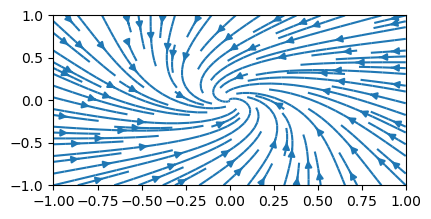

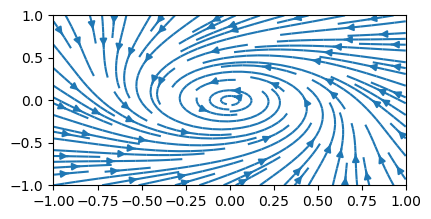

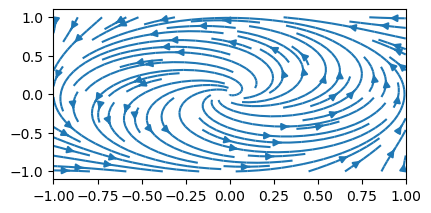

In [2]:
x0 = [0.25,0]
t = [0,5]
for alpha in [-1,0,1]:
    x1 = np.linspace(-1.0, 1.0, 15)
    x2 = np.linspace(-1.0, 1.0, 15)

    X1, X2 = np.meshgrid(x1, x2)
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    
    for i in range(NI):
        for j in range(NJ):
            x, y = X1[i, j], X2[i, j]
            vec = [x, y]
            dx1 = alpha*vec[0]-vec[1]-vec[0]*(vec[0]**2+vec[1]**2)
            dx2 = vec[0]+alpha*vec[1]-vec[1]*(vec[0]**2+vec[1]**2)
            
            vec_1 = [dx1, dx2]
            u[i, j], v[i, j] = vec_1[0], vec_1[1]

    
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X1, X2, u, v)

# Simulating orbits

In [3]:
initial_point1 = [2,0]
initial_point2 = [0.5,0]

t = [0,10]
alpha = 1
resolution = np.arange(t[0],t[1],0.1)

In [4]:
def A(t,vec,alpha):
    dx1 = alpha*vec[0]-vec[1]-vec[0]*(vec[0]**2+vec[1]**2)
    dx2 = vec[0]+alpha*vec[1]-vec[1]*(vec[0]**2+vec[1]**2)
    return [dx1, dx2]

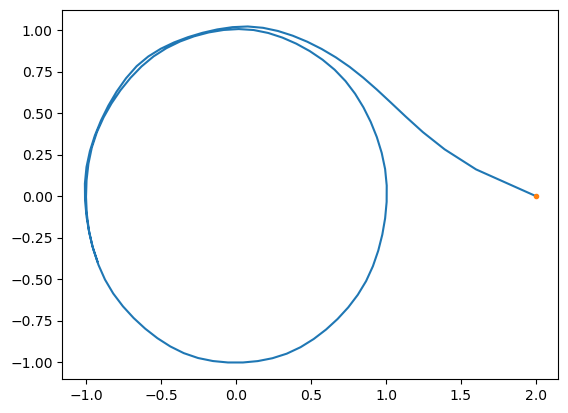

In [5]:
flow = scp.solve_ivp(A,t,initial_point1,args=[alpha],t_eval=resolution)
plt.figure()
plt.plot(flow.y[0], flow.y[1], "-") 
plt.plot(flow.y[0][0], flow.y[1][0], '.')

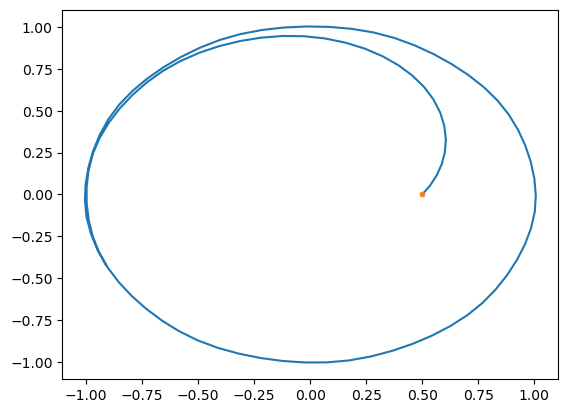

In [6]:
flow_2 = scp.solve_ivp(A,t,initial_point2,args=[alpha],t_eval=resolution)
plt.figure()
plt.plot(flow_2.y[0], flow_2.y[1], "-") 
plt.plot(flow_2.y[0][0], flow_2.y[1][0], '.')

# 3D

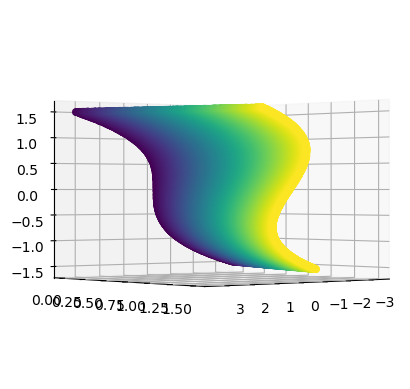

In [25]:
alphas_two_sampled = np.random.uniform(0, 1.5, 200000)
x_values_sampled = np.random.uniform(-1.5, 1.5, 200000)
alphas_two = []
alphas_one = []
x_values = []
for a2, x in zip(alphas_two_sampled, x_values_sampled):
    alphas_one.append(-a2 * x + x ** 3)
    alphas_two.append(a2)
    x_values.append(x)

rounding = 3
alphas_one = [round(a1, rounding) for a1 in alphas_one]
alphas_two = [round(a2, rounding) for a2 in alphas_two]
alphas_by_num = {}

ax = plt.axes(projection='3d')

ax.scatter(alphas_one, alphas_two, x_values,c=alphas_two ,depthshade= True)
ax.view_init(0, 50)
plt.show()
